# Traffic sign Classification with LE-NET

In [19]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# Import Data
with open("./traffic-signs-data/train.p", mode = 'rb') as training_data:
        train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode = 'rb') as validation_data:
        valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode = 'rb') as testing_data:
        test = pickle.load(testing_data)

In [3]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation =  valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [4]:
x_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
x_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
x_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

31

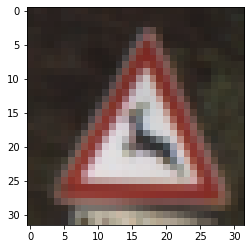

In [15]:
# Quick Check with the images
i = 500
plt.imshow(x_train[i])
y_train[i]

In [17]:
# Shuffle
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [22]:
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)

In [21]:
x_train_gray.shape

(34799, 32, 32, 1)

In [23]:
x_test_gray.shape

(12630, 32, 32, 1)

In [24]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [25]:
# Data Normalization
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

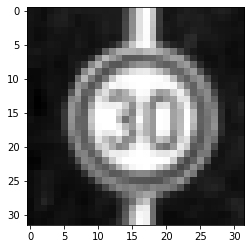

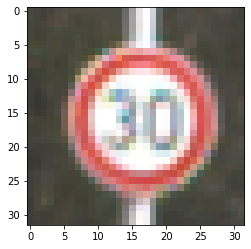

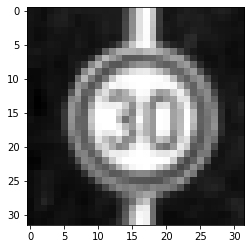

In [31]:
# Checking the image again
i = 610
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap='gray')

## Model Training:

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [38]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 6, kernel_size = (5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [39]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [49]:
history =  cnn_model.fit(x_train_gray_norm,
             y_train,
             batch_size=500,
             epochs = 500,
             verbose = 1,
             validation_data=(x_validation_gray_norm, y_validation))

Epoch 1/500
70/70 [==============================] - 3s 39ms/step - loss: 1.6208e-05 - accuracy: 1.0000 - val_loss: 0.8496 - val_accuracy: 0.9059
Epoch 2/500
70/70 [==============================] - 3s 39ms/step - loss: 1.5514e-05 - accuracy: 1.0000 - val_loss: 0.8542 - val_accuracy: 0.9070
Epoch 3/500
70/70 [==============================] - 3s 40ms/step - loss: 1.5022e-05 - accuracy: 1.0000 - val_loss: 0.8559 - val_accuracy: 0.9063
Epoch 4/500
70/70 [==============================] - 3s 39ms/step - loss: 1.4462e-05 - accuracy: 1.0000 - val_loss: 0.8569 - val_accuracy: 0.9068
Epoch 5/500
70/70 [==============================] - 3s 39ms/step - loss: 1.3833e-05 - accuracy: 1.0000 - val_loss: 0.8607 - val_accuracy: 0.9063
Epoch 6/500
70/70 [==============================] - 3s 40ms/step - loss: 1.3247e-05 - accuracy: 1.0000 - val_loss: 0.8588 - val_accuracy: 0.9066
Epoch 7/500
70/70 [==============================] - 3s 39ms/step - loss: 1.2786e-05 - accuracy: 1.0000 - val_loss: 0.8607 -

Epoch 57/500
70/70 [==============================] - 3s 42ms/step - loss: 2.2758e-06 - accuracy: 1.0000 - val_loss: 0.9692 - val_accuracy: 0.9091
Epoch 58/500
70/70 [==============================] - 3s 43ms/step - loss: 2.1791e-06 - accuracy: 1.0000 - val_loss: 0.9709 - val_accuracy: 0.9088
Epoch 59/500
70/70 [==============================] - 3s 47ms/step - loss: 2.1428e-06 - accuracy: 1.0000 - val_loss: 0.9788 - val_accuracy: 0.9098
Epoch 60/500
70/70 [==============================] - 3s 45ms/step - loss: 2.0544e-06 - accuracy: 1.0000 - val_loss: 0.9718 - val_accuracy: 0.9100
Epoch 61/500
70/70 [==============================] - 3s 43ms/step - loss: 1.9938e-06 - accuracy: 1.0000 - val_loss: 0.9723 - val_accuracy: 0.9091
Epoch 62/500
70/70 [==============================] - 3s 42ms/step - loss: 1.9173e-06 - accuracy: 1.0000 - val_loss: 0.9791 - val_accuracy: 0.9095
Epoch 63/500
70/70 [==============================] - 3s 42ms/step - loss: 1.8919e-06 - accuracy: 1.0000 - val_loss: 0

Epoch 113/500
70/70 [==============================] - 3s 45ms/step - loss: 2.4930e-05 - accuracy: 1.0000 - val_loss: 0.6849 - val_accuracy: 0.9166
Epoch 114/500
70/70 [==============================] - 3s 45ms/step - loss: 2.3559e-05 - accuracy: 1.0000 - val_loss: 0.6910 - val_accuracy: 0.9159
Epoch 115/500
70/70 [==============================] - 3s 44ms/step - loss: 2.2396e-05 - accuracy: 1.0000 - val_loss: 0.6920 - val_accuracy: 0.9161
Epoch 116/500
70/70 [==============================] - 3s 46ms/step - loss: 2.1324e-05 - accuracy: 1.0000 - val_loss: 0.6934 - val_accuracy: 0.9166
Epoch 117/500
70/70 [==============================] - 3s 45ms/step - loss: 2.0123e-05 - accuracy: 1.0000 - val_loss: 0.6965 - val_accuracy: 0.9163
Epoch 118/500
70/70 [==============================] - 3s 45ms/step - loss: 1.9297e-05 - accuracy: 1.0000 - val_loss: 0.6995 - val_accuracy: 0.9163
Epoch 119/500
70/70 [==============================] - 3s 47ms/step - loss: 1.8311e-05 - accuracy: 1.0000 - val_

70/70 [==============================] - 3s 41ms/step - loss: 2.5856e-06 - accuracy: 1.0000 - val_loss: 0.8151 - val_accuracy: 0.9168
Epoch 169/500
70/70 [==============================] - 3s 41ms/step - loss: 2.4727e-06 - accuracy: 1.0000 - val_loss: 0.8192 - val_accuracy: 0.9168
Epoch 170/500
70/70 [==============================] - 3s 41ms/step - loss: 2.4138e-06 - accuracy: 1.0000 - val_loss: 0.8181 - val_accuracy: 0.9172
Epoch 171/500
70/70 [==============================] - 3s 44ms/step - loss: 2.3350e-06 - accuracy: 1.0000 - val_loss: 0.8244 - val_accuracy: 0.9166
Epoch 172/500
70/70 [==============================] - 3s 41ms/step - loss: 2.2503e-06 - accuracy: 1.0000 - val_loss: 0.8254 - val_accuracy: 0.9168
Epoch 173/500
70/70 [==============================] - 3s 41ms/step - loss: 2.1650e-06 - accuracy: 1.0000 - val_loss: 0.8305 - val_accuracy: 0.9170
Epoch 174/500
70/70 [==============================] - 3s 43ms/step - loss: 2.0813e-06 - accuracy: 1.0000 - val_loss: 0.8346 -

70/70 [==============================] - 3s 43ms/step - loss: 4.2962e-07 - accuracy: 1.0000 - val_loss: 0.9541 - val_accuracy: 0.9147
Epoch 224/500
70/70 [==============================] - 3s 42ms/step - loss: 4.1237e-07 - accuracy: 1.0000 - val_loss: 0.9531 - val_accuracy: 0.9145
Epoch 225/500
70/70 [==============================] - 3s 41ms/step - loss: 3.8356e-07 - accuracy: 1.0000 - val_loss: 0.9602 - val_accuracy: 0.9152
Epoch 226/500
70/70 [==============================] - 3s 41ms/step - loss: 3.8161e-07 - accuracy: 1.0000 - val_loss: 0.9584 - val_accuracy: 0.9143
Epoch 227/500
70/70 [==============================] - 3s 41ms/step - loss: 3.6313e-07 - accuracy: 1.0000 - val_loss: 0.9554 - val_accuracy: 0.9152
Epoch 228/500
70/70 [==============================] - 3s 41ms/step - loss: 3.7720e-07 - accuracy: 1.0000 - val_loss: 0.9628 - val_accuracy: 0.9147
Epoch 229/500
70/70 [==============================] - 3s 41ms/step - loss: 3.6467e-07 - accuracy: 1.0000 - val_loss: 0.9639 -

70/70 [==============================] - 3s 42ms/step - loss: 1.3438e-05 - accuracy: 1.0000 - val_loss: 0.8663 - val_accuracy: 0.9095
Epoch 279/500
70/70 [==============================] - 3s 42ms/step - loss: 1.2840e-05 - accuracy: 1.0000 - val_loss: 0.8688 - val_accuracy: 0.9095
Epoch 280/500
70/70 [==============================] - 3s 41ms/step - loss: 1.2281e-05 - accuracy: 1.0000 - val_loss: 0.8717 - val_accuracy: 0.9095
Epoch 281/500
70/70 [==============================] - 3s 40ms/step - loss: 1.1725e-05 - accuracy: 1.0000 - val_loss: 0.8745 - val_accuracy: 0.9095
Epoch 282/500
70/70 [==============================] - 3s 41ms/step - loss: 1.1216e-05 - accuracy: 1.0000 - val_loss: 0.8760 - val_accuracy: 0.9098
Epoch 283/500
70/70 [==============================] - 3s 41ms/step - loss: 1.0733e-05 - accuracy: 1.0000 - val_loss: 0.8796 - val_accuracy: 0.9098
Epoch 284/500
70/70 [==============================] - 3s 41ms/step - loss: 1.0276e-05 - accuracy: 1.0000 - val_loss: 0.8818 -

70/70 [==============================] - 3s 43ms/step - loss: 1.6712e-06 - accuracy: 1.0000 - val_loss: 0.9848 - val_accuracy: 0.9109
Epoch 334/500
70/70 [==============================] - 3s 43ms/step - loss: 1.6157e-06 - accuracy: 1.0000 - val_loss: 0.9871 - val_accuracy: 0.9109
Epoch 335/500
70/70 [==============================] - 3s 42ms/step - loss: 1.5564e-06 - accuracy: 1.0000 - val_loss: 0.9903 - val_accuracy: 0.9111
Epoch 336/500
70/70 [==============================] - 3s 42ms/step - loss: 1.4974e-06 - accuracy: 1.0000 - val_loss: 0.9912 - val_accuracy: 0.9111
Epoch 337/500
70/70 [==============================] - 3s 41ms/step - loss: 1.4544e-06 - accuracy: 1.0000 - val_loss: 0.9922 - val_accuracy: 0.9111
Epoch 338/500
70/70 [==============================] - 3s 41ms/step - loss: 1.4015e-06 - accuracy: 1.0000 - val_loss: 0.9947 - val_accuracy: 0.9107
Epoch 339/500
70/70 [==============================] - 3s 41ms/step - loss: 1.3563e-06 - accuracy: 1.0000 - val_loss: 0.9987 -

70/70 [==============================] - 3s 41ms/step - loss: 2.5818e-07 - accuracy: 1.0000 - val_loss: 1.0996 - val_accuracy: 0.9116
Epoch 389/500
70/70 [==============================] - 3s 41ms/step - loss: 2.5696e-07 - accuracy: 1.0000 - val_loss: 1.0980 - val_accuracy: 0.9104
Epoch 390/500
70/70 [==============================] - 3s 41ms/step - loss: 2.4056e-07 - accuracy: 1.0000 - val_loss: 1.1026 - val_accuracy: 0.9111
Epoch 391/500
70/70 [==============================] - 3s 41ms/step - loss: 2.3306e-07 - accuracy: 1.0000 - val_loss: 1.1012 - val_accuracy: 0.9102
Epoch 392/500
70/70 [==============================] - 3s 41ms/step - loss: 2.2538e-07 - accuracy: 1.0000 - val_loss: 1.1090 - val_accuracy: 0.9104
Epoch 393/500
70/70 [==============================] - 3s 41ms/step - loss: 2.1879e-07 - accuracy: 1.0000 - val_loss: 1.1113 - val_accuracy: 0.9102
Epoch 394/500
70/70 [==============================] - 3s 42ms/step - loss: 2.1275e-07 - accuracy: 1.0000 - val_loss: 1.1126 -

70/70 [==============================] - 3s 42ms/step - loss: 4.2964e-08 - accuracy: 1.0000 - val_loss: 1.2176 - val_accuracy: 0.9095
Epoch 444/500
70/70 [==============================] - 3s 41ms/step - loss: 4.2529e-08 - accuracy: 1.0000 - val_loss: 1.2145 - val_accuracy: 0.9102
Epoch 445/500
70/70 [==============================] - 3s 41ms/step - loss: 4.0512e-08 - accuracy: 1.0000 - val_loss: 1.2219 - val_accuracy: 0.9098
Epoch 446/500
70/70 [==============================] - 3s 42ms/step - loss: 4.3674e-08 - accuracy: 1.0000 - val_loss: 1.2229 - val_accuracy: 0.9104
Epoch 447/500
70/70 [==============================] - 3s 42ms/step - loss: 3.7483e-08 - accuracy: 1.0000 - val_loss: 1.2237 - val_accuracy: 0.9098
Epoch 448/500
70/70 [==============================] - 3s 42ms/step - loss: 3.7415e-08 - accuracy: 1.0000 - val_loss: 1.2265 - val_accuracy: 0.9100
Epoch 449/500
70/70 [==============================] - 3s 41ms/step - loss: 3.5966e-08 - accuracy: 1.0000 - val_loss: 1.2240 -

70/70 [==============================] - 3s 41ms/step - loss: 1.4456e-05 - accuracy: 1.0000 - val_loss: 0.8502 - val_accuracy: 0.9066
Epoch 499/500
70/70 [==============================] - 3s 39ms/step - loss: 1.3680e-05 - accuracy: 1.0000 - val_loss: 0.8532 - val_accuracy: 0.9063
Epoch 500/500
70/70 [==============================] - 3s 40ms/step - loss: 1.2955e-05 - accuracy: 1.0000 - val_loss: 0.8555 - val_accuracy: 0.9066


## Model Evaluation:

In [48]:
score =  cnn_model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.4642 - accuracy: 0.8994
Test Accuracy: 0.8994457721710205


In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

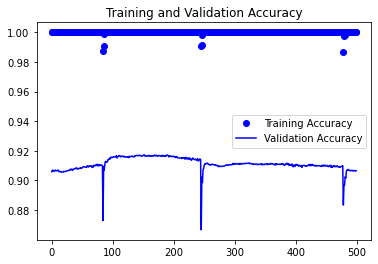

In [55]:
# Trained the model twice
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

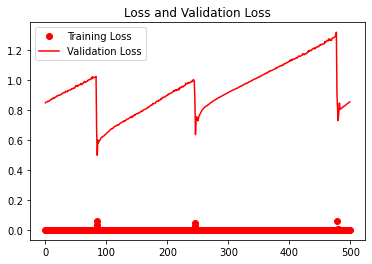

In [57]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss and Validation Loss')
plt.legend()

In [58]:
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)

<AxesSubplot:>

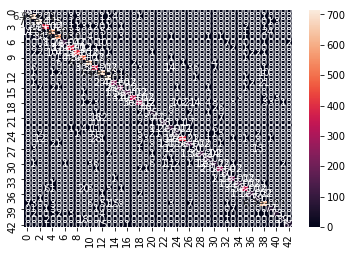

In [60]:
sns.heatmap(cm, annot = True)

<AxesSubplot:>

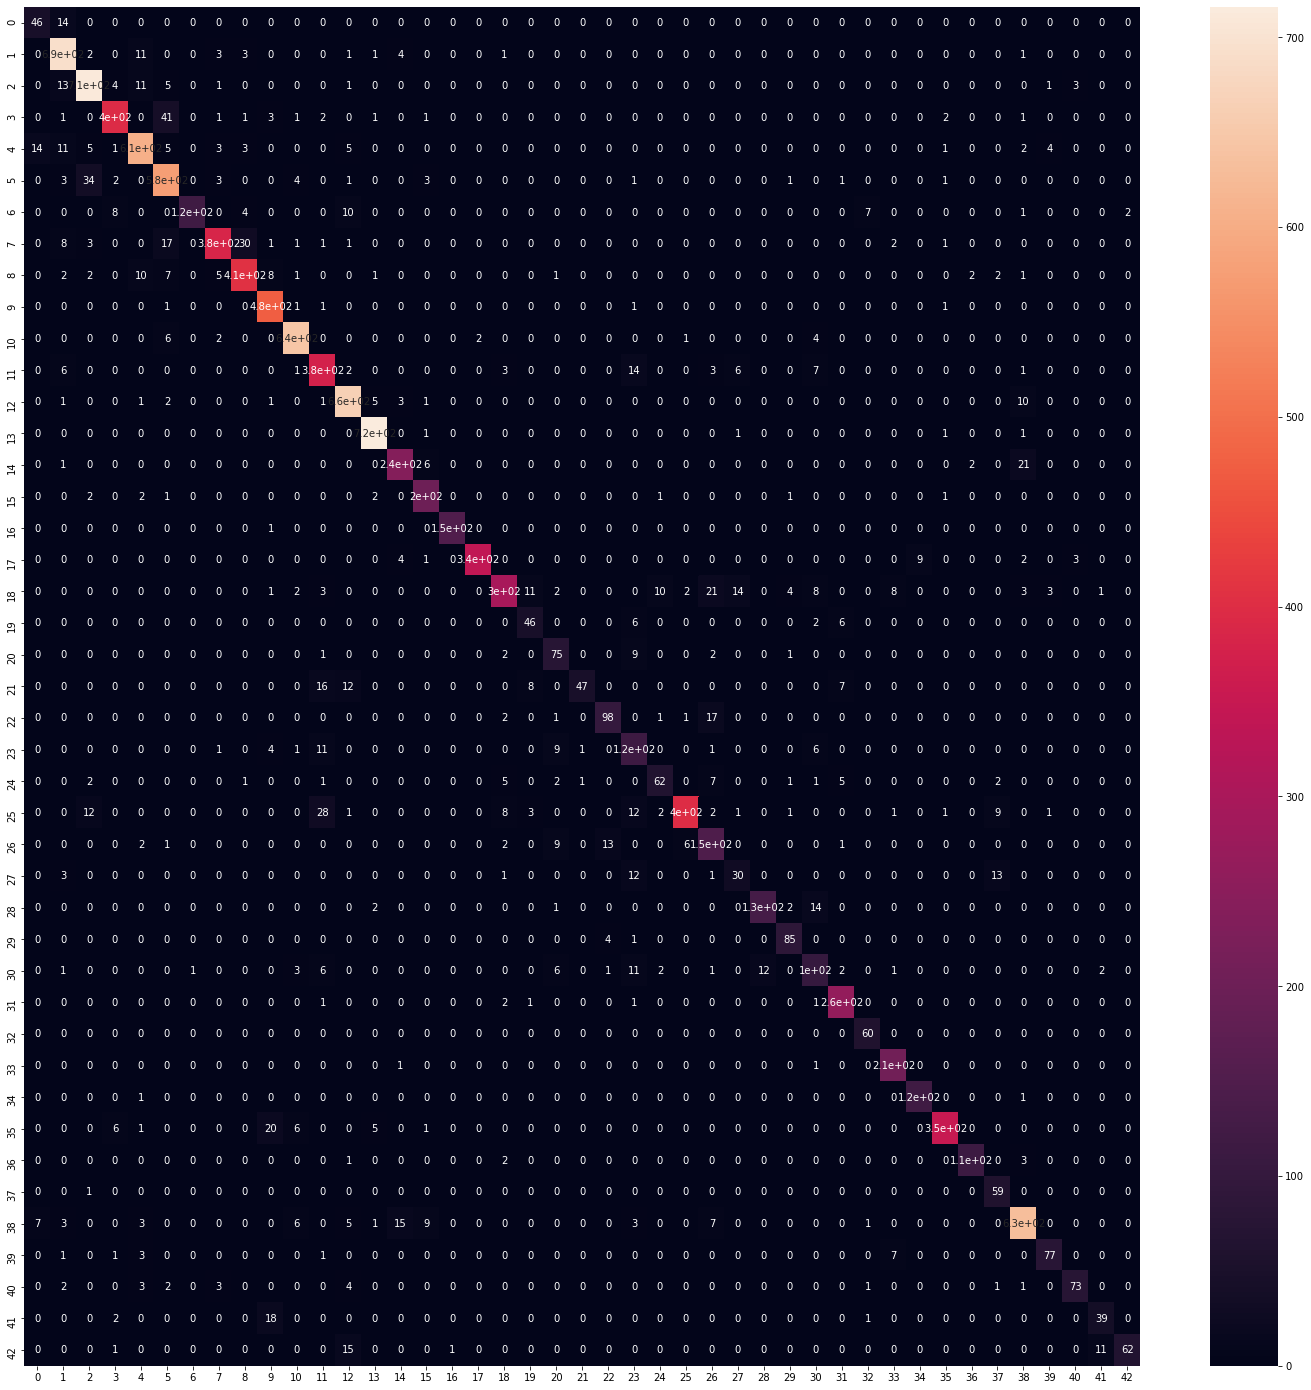

In [61]:
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot = True)

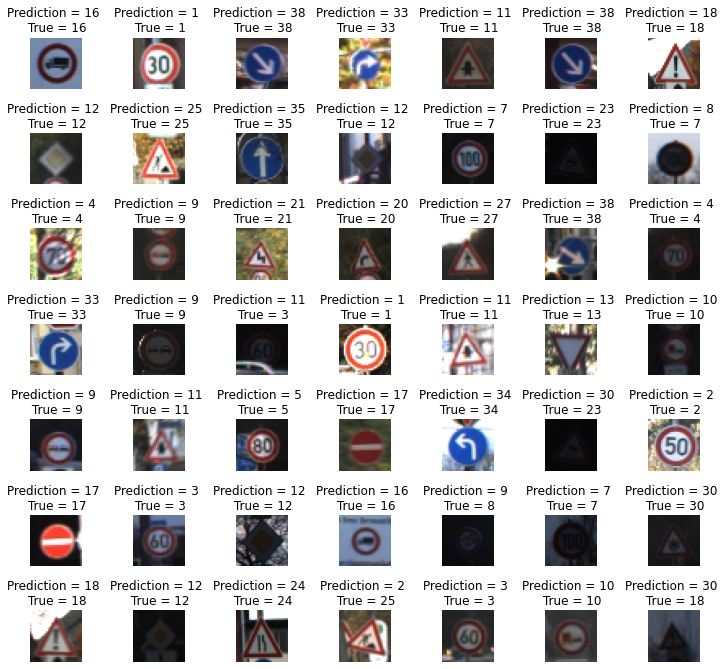

In [66]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)